In [1]:
cd

/home/vikas


In [2]:
cd Downloads/

/home/vikas/Downloads


In [3]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/vikas/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
adata = sc.read_visium('DD073R_A1_processed')
adata.var_names_make_unique()

/home/vikas/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/vikas/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
adata

AnnData object with n_obs × n_vars = 1175 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
adata.uns['spatial']['DD73RA1_rep2']['images']['hires'].shape

(2000, 1815, 3)

In [7]:
adata.obsm['spatial'].shape

(1175, 2)

In [8]:
adata.obs

,in_tissue,array_row,array_col
AAACAGAGCGACTCCT-1,1,14,94
AAACAGGGTCTATATT-1,1,47,13
AAACCGGGTAGGTACC-1,1,42,28
AAACCGTTCGTCCAGG-1,1,52,42
AAACTTGCAAACGTAT-1,1,45,19
...,...,...,...
TTGTTAGCAAATTCGA-1,1,22,42
TTGTTCAGTGTGCTAC-1,1,24,64
TTGTTTCACATCCAGG-1,1,58,42
TTGTTTCATTAGTCTA-1,1,60,30


In [9]:
adata.obs['thing'] = 'a'

/home/vikas/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


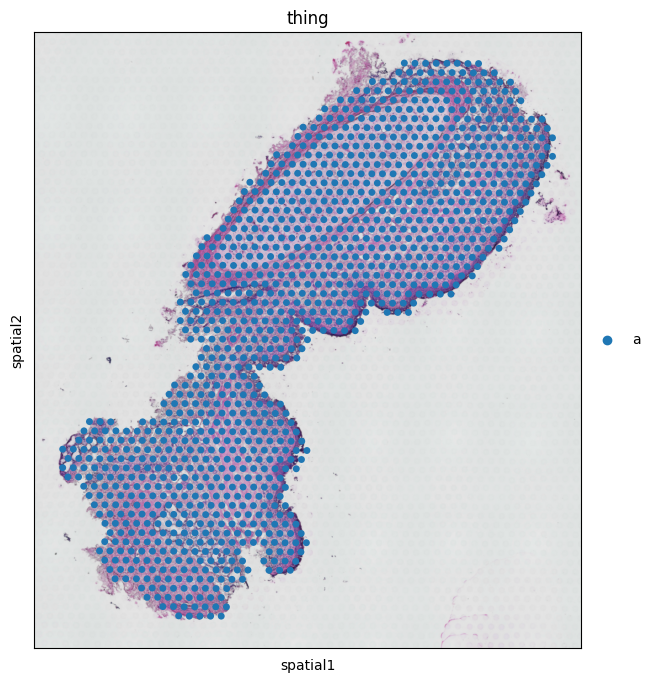

In [10]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, color = 'thing')

## Preprocessing

In [11]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

/tmp/ipykernel_58586/1172697097.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
/tmp/ipykernel_58586/1172697097.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=4

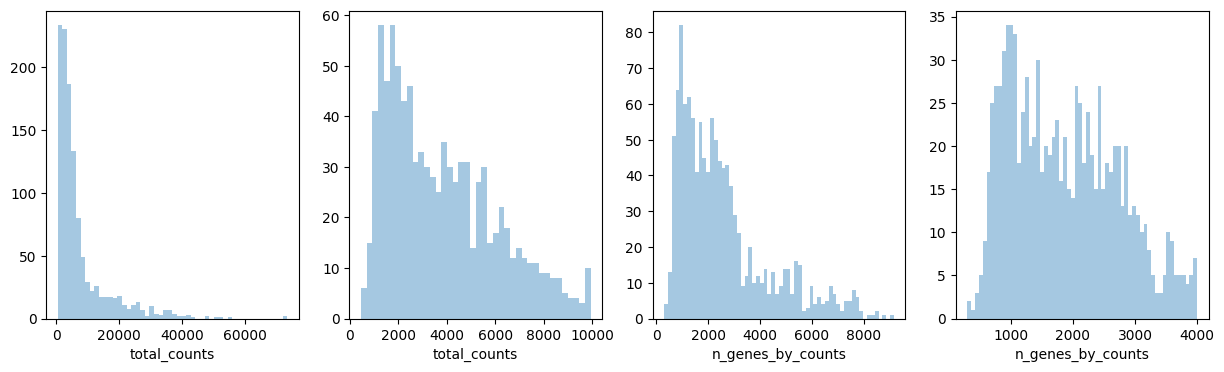

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

plt.show()

In [13]:
sc.pp.filter_cells(adata, min_counts = 1000)

sc.pp.filter_cells(adata, max_counts=35000) #bas

In [14]:
adata = adata[adata.obs["pct_counts_mt"] < 20]

sc.pp.filter_genes(adata, min_cells=3)

/home/vikas/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/home/vikas/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


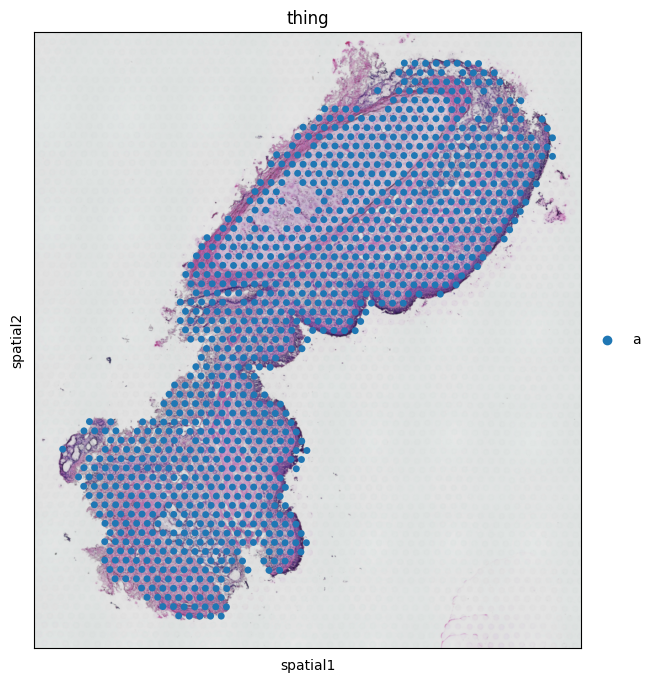

In [15]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, color = 'thing')

In [16]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

/home/vikas/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


## Clustering


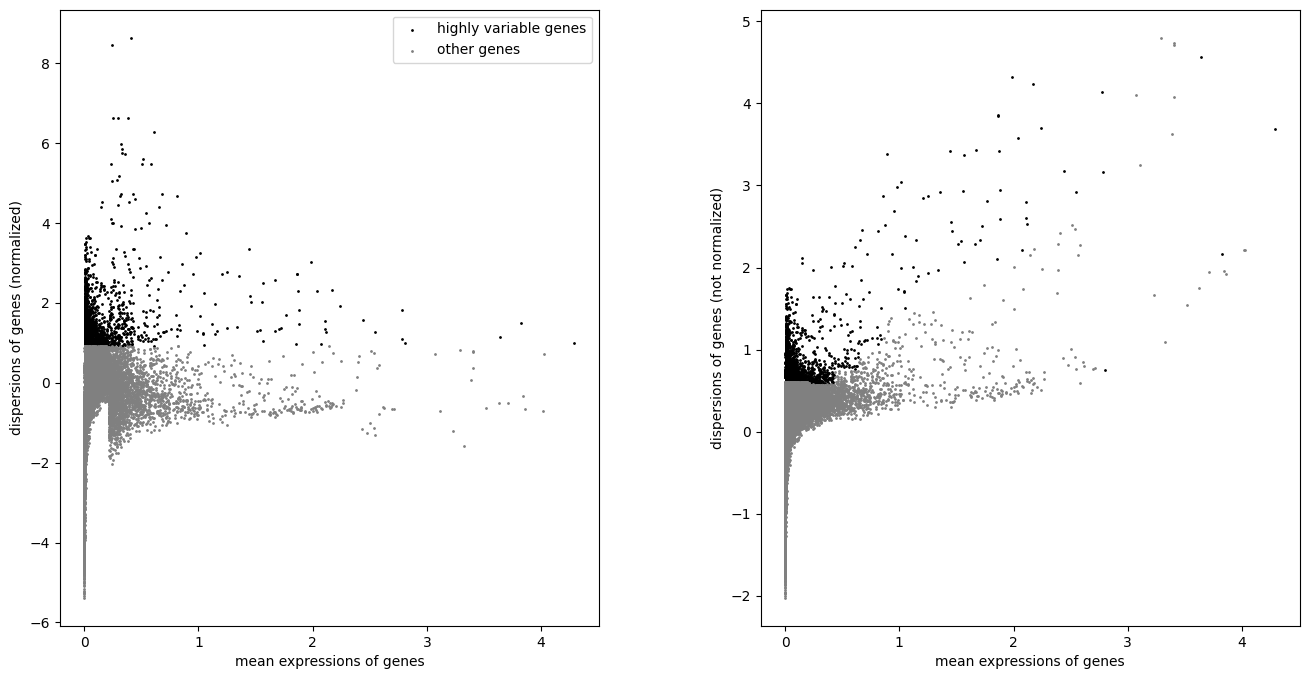

In [17]:
sc.pl.highly_variable_genes(adata)

In [18]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/home/vikas/anaconda3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/vikas/anaconda3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/vikas/anaconda3/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDeprecationWarni

/home/vikas/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/vikas/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


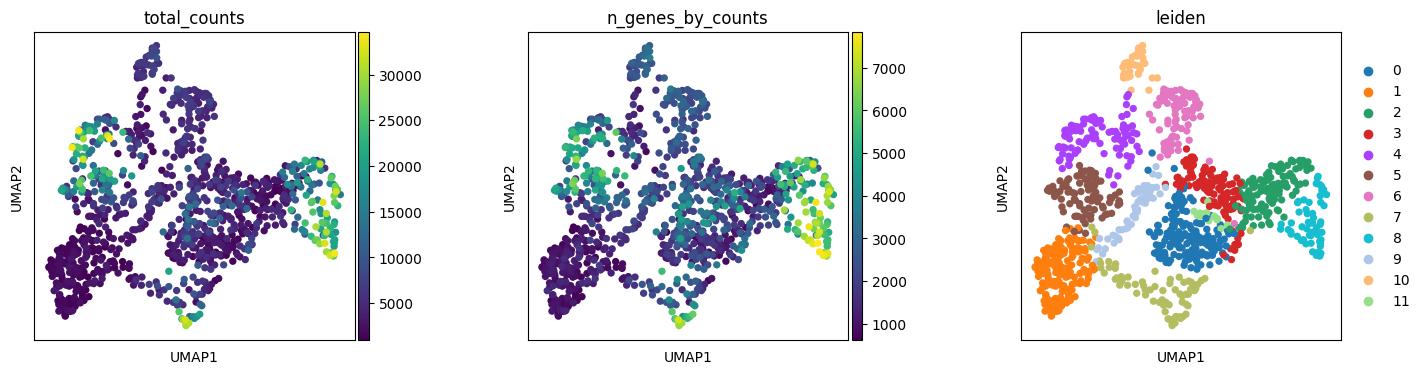

In [19]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden"], wspace=0.4)

## mean expression for each gene within each cluster

In [20]:
import numpy as np

# Step 1: Group cells based on their assigned clusters

grouped = adata.obs.groupby('leiden')

# Step 2: Calculate the mean expression for each gene within each cluster
mean_exp = {}
for cluster, indices in grouped.groups.items():
    # Calculate mean expression for genes in the cluster
    mean_exp[cluster] = np.asarray(adata[indices, :].X.mean(axis=0)).flatten()

# Step 3: Convert the mean expression dictionary to a DataFrame
mean_exp_df = pd.DataFrame(mean_exp, index=adata.var_names)

# Step 4: Optionally, you can print or further analyze the mean expression DataFrame
print(mean_exp_df)

                   0         1         2         3         4         5  \
AL627309.1  0.000000  0.000000  0.000000  0.000000  0.002068  0.007967   
AL627309.5  0.021796  0.023212  0.019664  0.000000  0.008085  0.022137   
AP006222.2  0.000000  0.000000  0.000000  0.000000  0.002414  0.000000   
LINC01409   0.031019  0.028382  0.018079  0.041354  0.038822  0.025524   
FAM87B      0.000000  0.008827  0.000000  0.010876  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
AL354822.1  0.008196  0.009057  0.000000  0.008079  0.000000  0.013322   
AL592183.1  0.018692  0.000000  0.010491  0.000000  0.008861  0.006664   
AC240274.1  0.012981  0.000000  0.002511  0.004574  0.000000  0.002199   
AC007325.4  0.019270  0.062626  0.061275  0.042285  0.029958  0.035384   
AC007325.2  0.011227  0.006838  0.019356  0.000000  0.000000  0.000000   

                   6         7         8         9        10        11  
AL627309.1  0.006344  0.001826  0.0073

/tmp/ipykernel_58586/3450510233.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata.obs.groupby('leiden')


## mean_exp_df trasfer to R in the same Jupyter notebook

In [31]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [33]:
%R -i mean_exp_df

In [34]:
%%R
library(METAFlux)

In [35]:
%%R
#calculate a single cluster normalized MRAS from gene expression using GPR(Gene-protein-reaction)

scores<-calculate_reaction_score(mean_exp_df)

86.731% metabolic related genes were found......
Computing metabolic reaction activity scores......
Preparing for score matrix......
Metabolic reaction activity scores successfully calculated 



In [36]:
%%R
# In METAFlux, ‘medium’ reflects the nutrients can be allowed to uptake into cells in TME
data("cell_medium")


In [37]:
%%R
#calculate the metabolic fluxes
flux<-compute_flux(mras=scores,medium = cell_medium)

  |======================================================================| 100%


Setting up for optimization.....
Computing bulk RNA-seq flux.....
In addition: Warning message:
In asMethod(object) :
  sparse->dense coercion: allocating vector of size 2.1 GiB


In [38]:
%%R
#normalization of flux scores
cbrt <- function(x) {
    sign(x) * abs(x)^(1/3)
}

flux=cbrt(flux)

In [39]:
%%R
#Extraction of targeted data from flux,For example glucose uptake reaction
data("nutrient_lookup_files")
glucose<-data.frame(glucose=flux[grep("HMR_9034",human_gem$ID),])
glucose

       glucose
0  -0.12295085
1  -0.15493336
2  -0.13760507
3  -0.12113307
4  -0.14337003
5  -0.14774046
6  -0.16093405
7  -0.17859773
8  -0.16915813
9  -0.11361033
10 -0.15701665
11 -0.09354683


In [40]:
%%R
#compute pathway level activity for all cluster
pathway<-unique(unlist(human_gem$SUBSYSTEM))
pathway_score<-list()
for (i in pathway){
path=i
activity_score<-c()
for (d in 1:ncol(flux)){
activity_score[d]<-mean(abs(flux[which(unlist(human_gem$SUBSYSTEM)==i),d]))
} 
pathway_score[[i]]<-activity_score
}

all_pathway_score<-as.data.frame(do.call(rbind,pathway_score))

In [42]:
%%R
subset_data <- all_pathway_score[1:20, ]


In [43]:
%%R
print(subset_data)

                                                     V1          V2          V3
Glycolysis / Gluconeogenesis                0.061116500 0.062714083 0.058169006
Starch and sucrose metabolism               0.009121972 0.005883116 0.007880190
Galactose metabolism                        0.023933952 0.035480035 0.028235406
Fructose and mannose metabolism             0.025914751 0.018038893 0.024722983
Pentose and glucuronate interconversions    0.026607283 0.018416104 0.024585929
Pyruvate metabolism                         0.024887760 0.025197859 0.025497230
Propanoate metabolism                       0.015595526 0.011169630 0.012301234
Butanoate metabolism                        0.013982135 0.018646733 0.014689953
Pentose phosphate pathway                   0.070741708 0.068836614 0.077710514
Purine metabolism                           0.028452258 0.027435465 0.029543494
Pyrimidine metabolism                       0.025897063 0.023920375 0.026302228
Nucleotide metabolism                   

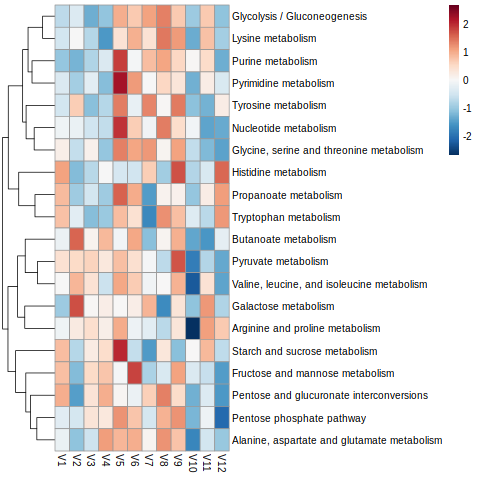

In [44]:
%%R
# heatmap
mapal <- colorRampPalette(RColorBrewer::brewer.pal(11,"RdBu"))(256)
f <- pheatmap::pheatmap(subset_data,cluster_cols = F,color = rev(mapal),scale = "row")

In [45]:
%%R
write.csv(subset_data, file = "subset_data.csv", row.names = TRUE)


In [111]:
#import pandas as pd

# Specify the path to the CSV file
#csv_file_path = 'subset_data.csv'

# Read the CSV file into a pandas DataFrame
#subset_data_df = pd.read_csv(csv_file_path)


In [46]:
# Map the cluster to the frist pathway scores(Glycolysis / Gluconeogenesis)
pathway_scores = {
    "0": 0.061116500 ,
    "1": 0.062714083,
    "2": 0.058169006,
    "3": 0.059429799,
    "4": 0.069195063,
    "5": 0.067934082,
    "6": 0.069719753,
    "7": 0.071027339,
    "8": 0.067910655,
    "9": 0.059798776,
    "10": 0.067940019,
    "11": 0.059345397
}

# Map the leiden values to the pathway scores
adata.obs['Glycolysis / Gluconeogenesis'] = adata.obs['leiden'].map(pathway_scores)


In [47]:
adata.obs

,in_tissue,array_row,array_col,thing,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_counts,leiden,Glycolysis / Gluconeogenesis
AAACAGAGCGACTCCT-1,1,14,94,a,2265,7.725771,4567.0,8.426830,24.523757,33.873440,44.230348,59.054084,379.0,5.940171,8.298664,4567.0,3,0.059430
AAACCGGGTAGGTACC-1,1,42,28,a,2418,7.791110,5088.0,8.534837,23.919025,31.741352,41.332547,56.721698,576.0,6.357842,11.320755,5088.0,0,0.061116
AAACCGTTCGTCCAGG-1,1,52,42,a,2743,7.917172,6143.0,8.723231,25.297086,32.801563,42.064138,56.649845,548.0,6.308098,8.920722,6143.0,6,0.069720
AAACTTGCAAACGTAT-1,1,45,19,a,2189,7.691657,6093.0,8.715060,38.634499,48.022321,57.557853,69.998359,573.0,6.352629,9.404235,6093.0,4,0.069195
AAAGGCTCTCGCGCCG-1,1,55,55,a,5699,8.648221,17169.0,9.750919,21.550469,29.401829,38.225872,50.358204,1555.0,7.349874,9.057021,17169.0,2,0.058169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTAGCAAATTCGA-1,1,22,42,a,1072,6.978214,1821.0,7.507690,26.633718,36.079077,48.709500,68.588688,97.0,4.584968,5.326744,1821.0,1,0.062714
TTGTTCAGTGTGCTAC-1,1,24,64,a,2034,7.618251,4157.0,8.332789,24.585037,33.894636,44.479192,61.029589,350.0,5.860786,8.419533,4157.0,3,0.059430
TTGTTTCACATCCAGG-1,1,58,42,a,4957,8.508758,20920.0,9.948508,48.723709,53.957935,59.756214,67.958891,3707.0,8.218248,17.719885,20920.0,4,0.069195
TTGTTTCATTAGTCTA-1,1,60,30,a,2076,7.638680,4469.0,8.405144,27.769076,36.249720,45.938689,61.691654,493.0,6.202536,11.031551,4469.0,10,0.067940


/home/vikas/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/vikas/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


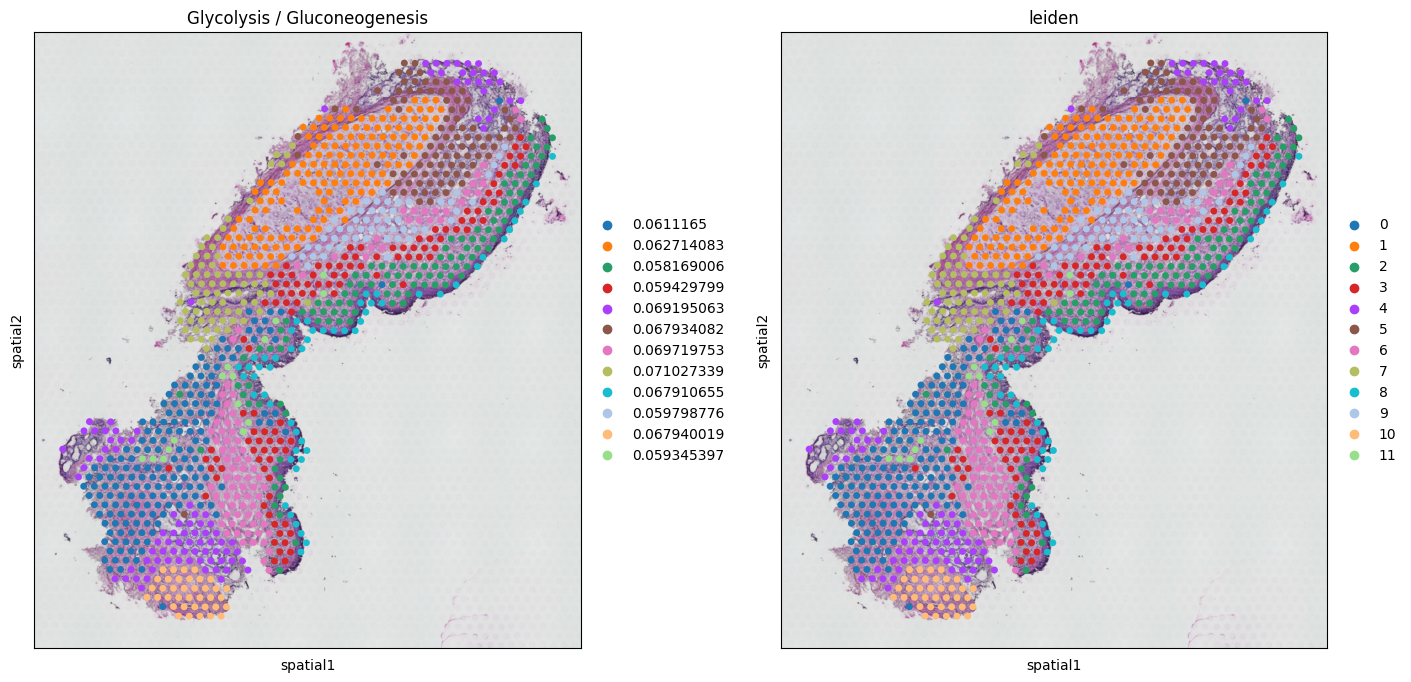

In [48]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["Glycolysis / Gluconeogenesis", "leiden"])

for analysis i used public data In this spatial map, I am visualizing the Glycolysis/Gluconeogenesis pathway scores for each cluster. Each cluster is represented by a color, and the intensity of the color indicates the pathway score associated with that clusters. Additionally, I am continuously exploring ways to enhance this pipeline and new algorithms or tools to improve the analysis further.